In [357]:
from math import *
import networkx as nx
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
%matplotlib inline 
from colour import *
import warnings
warnings.filterwarnings('ignore')
import geopy.distance
import googlemaps
import datetime

# Building and Refining a Vertiport Network 

In [2]:
regional_airports_la = pd.DataFrame(columns = ['Airport Name', 'Code', 'Latitude', 'Longitude', 'Zip Code'])

regional_airports_la['Airport Name'] = ['Hollywood Burbank Airport',
                                        'Long Beach Airport',
                                        'Brackett Field',
                                        'Camarillo Airport',
                                        'Chino Airport',
                                        'El Monte Airport',
                                        'Fullerton Municipal Airport',
                                        'General William J. Fox Airfield',
                                        'Hawthorne Municipal Airport',
                                        'Oxnard Airport',
                                        'Palmdale Regional Airport',
                                        'Riverside Municipal Airport',
                                        'Santa Monica Airport',
                                        'Southern California Logistics Airport',
                                        'Van Nuys Airport',
                                        'Whiteman Airport',
                                        'Zamperini Field',
                                        'Agua Dulce Airpark',
                                        'Apple Valley Airport',
                                        'Cable Airport',
                                        'Catalina Airport',
                                        'Compton/Woodley Airport',
                                        'Corona Municipal Airport',
                                        'Flabob Airport',
                                        'Perris Valley Airport',
                                        'Relands Municipal Airport',
                                        'Santa Barbara Airport',
                                        'Rincon Island Vertiport',
                                        'San Diego International Airport']

regional_airports_la['Code'] = ['BUR',
                               'LGB',
                               'POC',
                                'CMA',
                               'CNO',
                               'EMT',
                               'FUL',
                               'WJF',
                               'HHR',
                               'OXR',
                               'PMD',
                               'RAL',
                               'SMO',
                               'VCV',
                               'VNY',
                               'WHP',
                               'TOA',
                               np.NaN,
                               'APV',
                               'CCB',
                               'AVX',
                               'CPM',
                               'AJO',
                               'RIR',
                               np.NaN,
                               'REI',
                               'SBA',
                               np.NaN,
                               'SAN']

regional_airports_la['Zip Code'] = [91505,
                                   90808,
                                   91750,
                                   93010,
                                   91710,
                                   91731,
                                   92833,
                                   93536,
                                   90250,
                                   93030,
                                   93550,
                                   92504,
                                   90405,
                                   92394,
                                   91406,
                                   91331,
                                   90505,
                                   91390,
                                   92307,
                                   91786,
                                   90704,
                                   90220,
                                   92880,
                                   92509,
                                   92570,
                                   92374,
                                   93117,
                                   31000,
                                   92101]

In [3]:
f = pd.read_csv('data/airports.dat.txt', header = None)
f = f.rename(columns = {0: 'ID', 1: 'Name', 2: 'City', 3: 'Country', 4: 'IATA', 5: 'ICAO', 6: 'Latitude', 7: 'Longitude',
         8: 'Altitude', 9: 'Timezone', 10: 'DST', 11: 'Tz Database Timzone', 12: 'Type', 13: 'Source'})
f = f[f['Country'] == 'United States']

In [4]:
#geographical data taken from https://openflights.org/data.html

latitudes = []
longitudes = []
for i in regional_airports_la['Code']:
    iata_code = i
    if iata_code == np.NaN:
        icao_code = np.NaN
    else:
        icao_code = "K" + str(iata_code)
    try: 
        current_code_index = f[f['IATA'] == iata_code].index[0]
    except:
        try:
            current_code_index = f[f['ICAO'] == icao_code].index[0]
        except: current_code_index = 'MISSING'
    if current_code_index == 'MISSING':
        latitudes.append('MISSING')
        longitudes.append('MISSING')
    else:
        latitudes.append(f.loc[current_code_index]['Latitude'])
        longitudes.append(f.loc[current_code_index]['Longitude'])
regional_airports_la['Latitude'] = latitudes
regional_airports_la['Longitude'] = longitudes

In [5]:
regional_airports_la.iloc[17, 2] = 34.5038813; regional_airports_la.iloc[17, 3] = -118.3136901; 
regional_airports_la.iloc[18, 2] = 34.5733; regional_airports_la.iloc[18, 3] = -117.1904;
regional_airports_la.iloc[21, 2] = 33.887329784; regional_airports_la.iloc[21,3] = -118.239499042;
regional_airports_la.iloc[22, 2] = 33.891996432; regional_airports_la.iloc[22,3] = -117.601497594;
regional_airports_la.iloc[24, 2] = 33.7587802982; regional_airports_la.iloc[24,3] = -117.218065794;
regional_airports_la.iloc[27, 2] = 34.3477; regional_airports_la.iloc[27,3] = -119.4453;
lax = pd.DataFrame(data = {'Airport Name': ['Los Angeles Airport'], 'Code': ['LAX'], 'Latitude': [33.942791], 'Longitude': [-118.410042], 'Zip Code': [90045]})
regional_airports_la = pd.concat([regional_airports_la, lax], axis = 0, ignore_index = True)

In [6]:
regional_airports_la

,Airport Name,Code,Latitude,Longitude,Zip Code
0,Hollywood Burbank Airport,BUR,34.2007,-118.359,91505
1,Long Beach Airport,LGB,33.8177,-118.152,90808
2,Brackett Field,POC,34.0916,-117.782,91750
3,Camarillo Airport,CMA,34.2137,-119.094,93010
4,Chino Airport,CNO,33.9747,-117.637,91710
5,El Monte Airport,EMT,34.0861,-118.035,91731
6,Fullerton Municipal Airport,FUL,33.872,-117.98,92833
7,General William J. Fox Airfield,WJF,34.7411,-118.219,93536
8,Hawthorne Municipal Airport,HHR,33.9228,-118.335,90250
9,Oxnard Airport,OXR,34.2008,-119.207,93030


In [7]:
regional_airports_la = regional_airports_la.set_index('Airport Name')

In [ ]:
#run this cell to convert to a CSV file
regional_airports_la.to_csv('regional_airport_network.csv')

# 1. Creating the Base Network from the Dataframe of Regional Airports

In [8]:
#create a dictionary of latitudes and longitudes for graphing purposes
#longitude is the x-axis, latitude is the y-axis
lat_lon_dict_airports = {}
for k in range(len(regional_airports_la)):
    lat_lon_dict_airports[regional_airports_la.index[k]] = (regional_airports_la.iloc[k]['Longitude'], 
                                                            regional_airports_la.iloc[k]['Latitude'])
    

In [11]:
regional_airports_la_network = nx.Graph()
for i in regional_airports_la.index:
    regional_airports_la_network.add_edge('Los Angeles Airport', i)

In [12]:
xlim = [regional_airports_la['Longitude'].min() - 0.15, regional_airports_la['Longitude'].max() + 0.15]
ylim = [regional_airports_la['Latitude'].min() -0.1, regional_airports_la['Latitude'].max() +0.1]

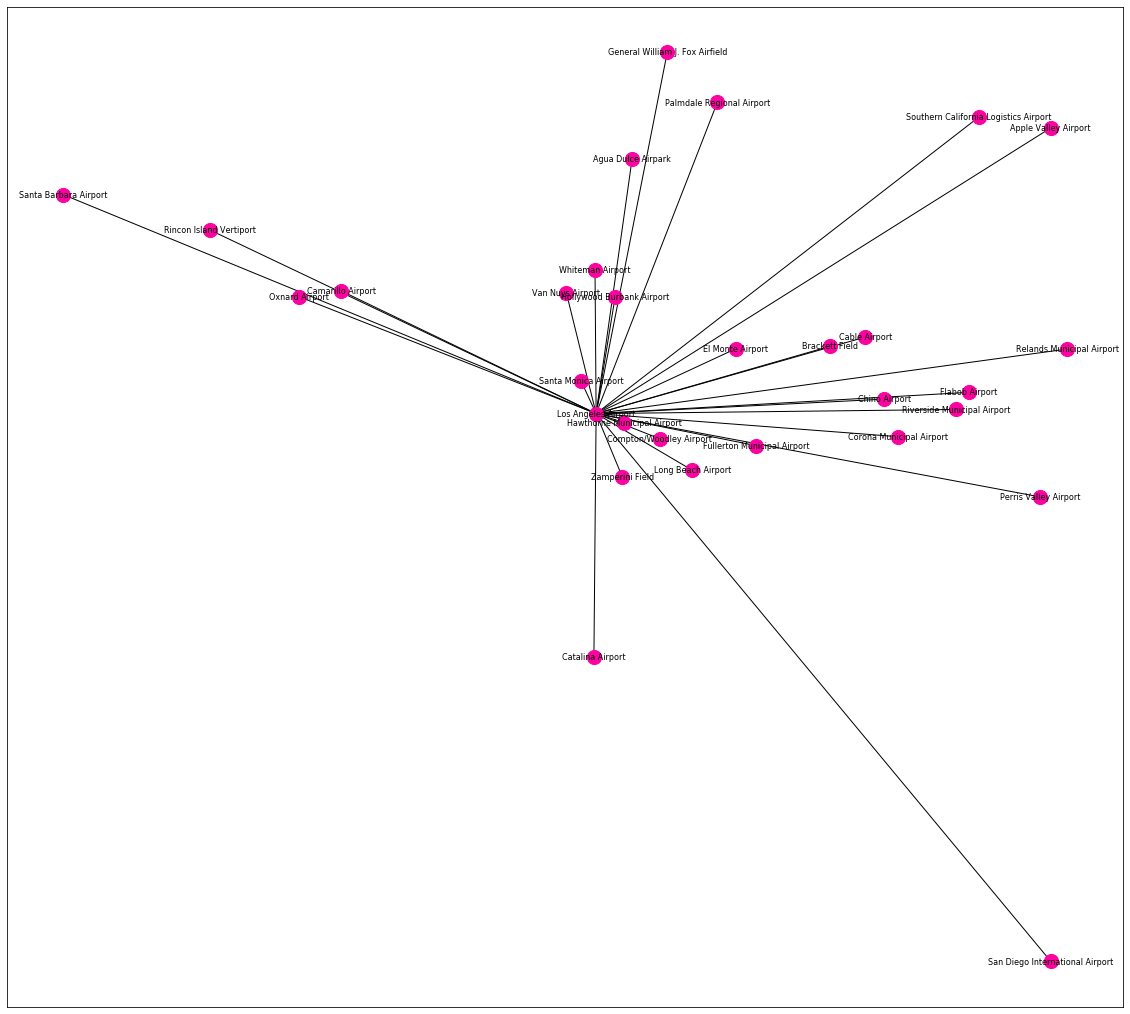

In [13]:
plt.subplots(figsize = (20, 18.4))
nx.draw_networkx(regional_airports_la_network, pos = lat_lon_dict_airports, node_size = 200, 
                 node_color = '#fc03a1', font_size = 8, alpha = 1)
plt.xlim(xlim[0], xlim[1])
plt.ylim(ylim[0], ylim[1])
plt.savefig('possible_locations.png', transparent= True, bbox_inches = 'tight', pad_inches = 0, dpi = 300)

# 2a. Using LAX Survey Data to Calculate Demand for Final Destination Zipcodes

In [14]:
lax_raw_data = pd.read_csv('data/2015_LAX_RawSurveyData.csv', header = [1])

la_county_zip_codes = pd.read_csv('data/la_county_zipcodes.csv')
sb_county_zip_codes = pd.read_csv('data/sb_county_zipcodes.csv', header = None)
sd_county_zip_codes = pd.read_csv('data/sd_county_zipcodes.csv', header = None)

la_county_zip_codes = la_county_zip_codes['ZIPCODE']
sb_county_zip_codes = sb_county_zip_codes[0]
sd_county_zip_codes = sd_county_zip_codes[0]

list_zip_codes = lax_raw_data['Zip_Final'] 

list_zip_codes = list_zip_codes.dropna()

In [15]:
def return_subset(original_list, subset_list):
    subset = [i for i in original_list if i in subset_list]
    return subset

In [16]:
#just getting zip codes from people in LA, SB, and SD counties
la_survey_zipcodes = return_subset(list_zip_codes, list(la_county_zip_codes))

sb_survey_zipcodes = return_subset(list_zip_codes, list(sb_county_zip_codes))

sd_survey_zipcodes = return_subset(list_zip_codes, list(sd_county_zip_codes))

In [17]:
#make dictionary of demand by zip-code
zip_code_dict = {}
for i in la_survey_zipcodes:
    if i in zip_code_dict:
        zip_code_dict[int(i)] += 1
    else:
        zip_code_dict[int(i)] = 1
        
for j in sb_survey_zipcodes:
    if j in zip_code_dict:
        zip_code_dict[int(j)] += 1
    else:
        zip_code_dict[int(j)] = 1

for k in sd_survey_zipcodes:
    if k in zip_code_dict:
        zip_code_dict[int(k)] += 1
    else:
        zip_code_dict[int(k)] = 1

In [18]:
zip_codes_latlon = pd.read_csv('data/zipcode_latlong_database.csv', header = None)
zip_codes_latlon = zip_codes_latlon.rename(columns = {0:'Zip Code', 1:'Latitude', 2:'Longitude'})

rincon_island = {'Zip Code': 31000, 'Latitude': 34.3477, 'Longitude': -119.4453}
zip_codes_latlon.append(rincon_island, ignore_index = True)
zip_codes_lat_lon = zip_codes_latlon.set_index('Zip Code')

In [19]:
lat_lon_dict_zipcode = {}
for k in zip_codes_lat_lon.index:
    lat_lon_dict_zipcode[k] = (zip_codes_lat_lon.loc[k]['Longitude'], 
                               zip_codes_lat_lon.loc[k]['Latitude'])

In [20]:
demand_network_nodes = nx.Graph()
for aa in zip_code_dict:
    demand_network_nodes.add_node(aa)

# 2b. Visualizing Demand around LA Basin, Santa Barbara, San Diego

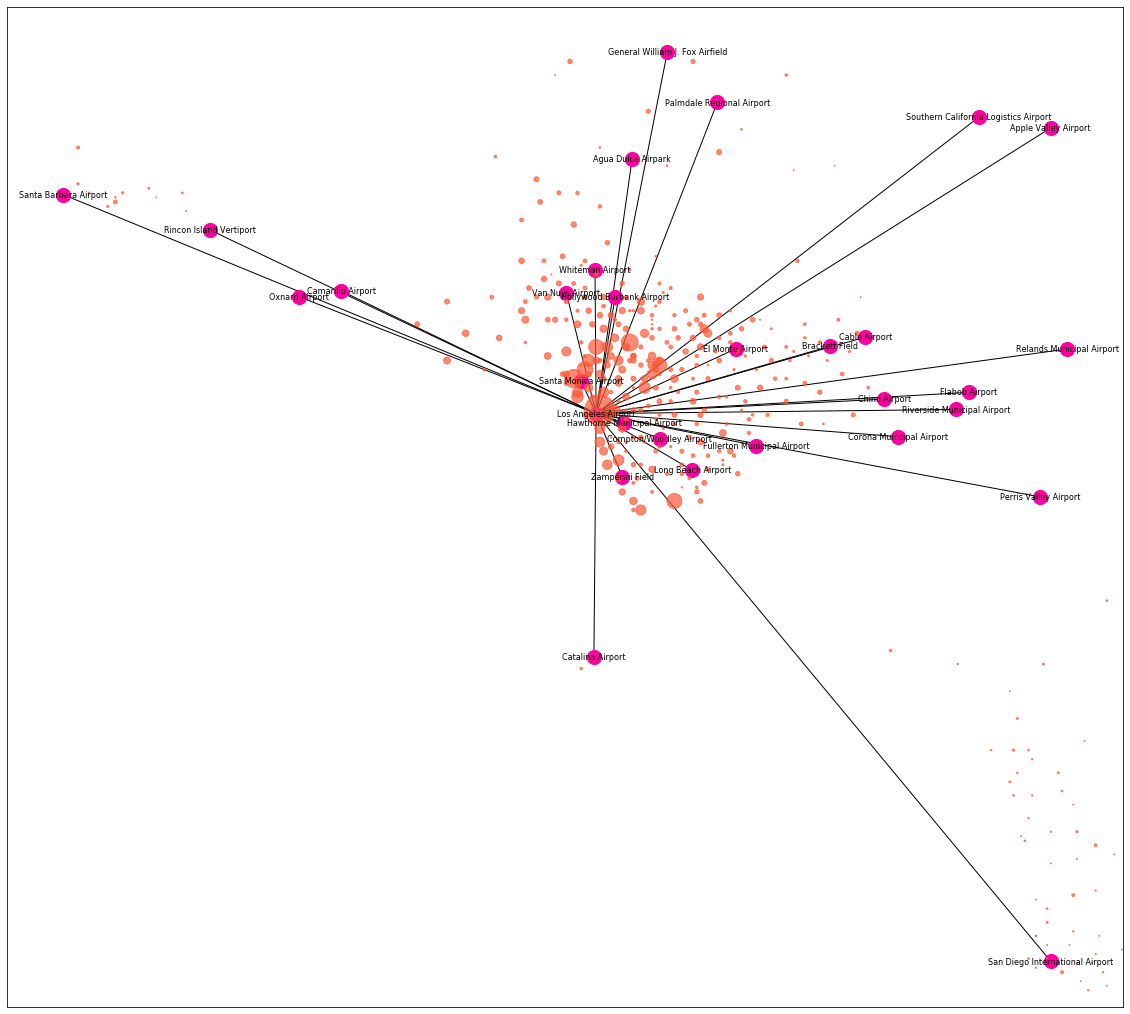

In [21]:
plt.subplots(figsize = (20, 18.4))
nx.draw_networkx(regional_airports_la_network, pos = lat_lon_dict_airports, node_size = 200, 
                 node_color = '#fc03a1', font_size = 8, alpha = 1)
nx.draw_networkx(demand_network_nodes, pos = lat_lon_dict_zipcode, 
                 node_size = [s for s in list(zip_code_dict.values())], 
                 node_color = '#ff5736', with_labels = False, alpha = 0.7)
plt.xlim(xlim[0], xlim[1])
plt.ylim(ylim[0], ylim[1])
#plt.savefig('demand_network.png', transparent= True, bbox_inches = 'tight', pad_inches = 0, dpi = 300)
plt.show()

# Analysis I: Using Distance as the Crow Flies to Refine Network
**Note: threshold is currently set to 13 miles**

In [22]:
#define variables that need to be added to in for-loop
distances_dictionary = {}
zipcodes_dictionary = {}
zipcodes_serviced_list = []

for ii in regional_airports_la.index: #change name later to be more descriptive
    current_zip_code = regional_airports_la.loc[ii]['Zip Code']
    airport_lat = regional_airports_la.loc[ii]['Latitude']
    airport_lon = regional_airports_la.loc[ii]['Longitude']
    
    current_airport_distances = []
    zip_codes_serviced_current = []
    zipcodes_serviced_list_current = []
    for jj in zip_code_dict:
        
        zipcode_lat = lat_lon_dict_zipcode[jj][1]
        zipcode_lon = lat_lon_dict_zipcode[jj][0]
        #next line: creates a tuple of zip code, and distance between that zip code and airport
        current_distance = geopy.distance.distance((airport_lat, airport_lon),
                                                    (zipcode_lat, zipcode_lon)).miles
        if current_distance < 13:
            current_airport_distances.append(current_distance)
            zip_codes_serviced_current.append(jj)
            zipcodes_serviced_list_current.append(jj)
                
    distances_dictionary[ii] = current_airport_distances
    zipcodes_dictionary[ii] = zip_codes_serviced_current
    zipcodes_serviced_list.append(zipcodes_serviced_list_current)

# Analysis II: Using Travel Time to Refine Network 
**Note: This analysis takes a really long time (> 30 mins). Do not run the next cell if you do not want to wait indefinitely for this code to finish running.**

In [ ]:
## Analysis 2: Using Travel Times
#define variables that need to be added to in for-loop
travel_times_dictionary = {}
zipcodes_dictionary = {}
zipcodes_serviced_list = []
lax_lat = regional_airports_la.loc['Los Angeles Airport']['Latitude']
lax_lon = regional_airports_la.loc['Los Angeles Airport']['Longitude']

for ii in regional_airports_la.index: 
    current_zip_code = regional_airports_la.loc[ii]['Zip Code']
    vert_lat = regional_airports_la.loc[ii]['Latitude']
    vert_lon = regional_airports_la.loc[ii]['Longitude']
    vertiport_to_lax = get_driving_distance((vert_lat, vert_lon), (lax_lat, lax_lon))
    flying_time_vert_to_lax = vertiport_to_lax*(1-0.83)
    
    current_airport_travel_times = []
    zip_codes_serviced_current = []
    zipcodes_serviced_list_current = []
    for jj in zip_code_dict:
        
        zipcode_lat = lat_lon_dict_zipcode[jj][1]
        zipcode_lon = lat_lon_dict_zipcode[jj][0]
        
        try:
            #driving time from center of zipcode to vertiport location
            driving_time_to_vert = get_driving_distance((zipcode_lat, zipcode_lon), (vert_lat, vert_lon))
            #travel time = driving time to vertiport + flying time to LAX
            travel_time_zip_to_lax = driving_time_to_vert + flying_time_vert_to_lax
            #if the travel time is below 16 minutes!
            if travel_time_zip_to_lax < 16:
                driving_time_to_lax = get_driving_distance((zipcode_lat, zipcode_lon), (lax_lat, lax_lon))
                #if travel time is below 16 minutes and less than the driving time to LAX
                if travel_time_zip_to_lax < driving_time_to_lax:
                    current_airport_travel_times.append(travel_time_zip_to_lax)
                    zip_codes_serviced_current.append(jj)
                    zipcodes_serviced_list_current.append(jj)
        except:
            pass
   
    travel_times_dictionary[ii] = current_airport_travel_times
    zipcodes_dictionary[ii] = zip_codes_serviced_current
    zipcodes_serviced_list.append(zipcodes_serviced_list_current)

# Start Running Code Below:

In [23]:
zip_codes_serviced_flat = [item for sublist in zipcodes_serviced_list for item in sublist]
zip_codes_serviced_flat = np.array(zip_codes_serviced_flat)
zip_codes_serviced_flat_unique = np.unique(zip_codes_serviced_flat)

In [24]:
#find the zip codes not serviced
zipcodes_not_serviced_la = list(set(np.unique(la_survey_zipcodes)) - set(zip_codes_serviced_flat_unique))
zipcodes_not_serviced_sb = list(set(np.unique(sb_survey_zipcodes)) - set(zip_codes_serviced_flat_unique))
zipcodes_not_serviced_sd = list(set(np.unique(sd_survey_zipcodes)) - set(zip_codes_serviced_flat_unique))
zipcodes_not_serviced = zipcodes_not_serviced_la + zipcodes_not_serviced_sb + zipcodes_not_serviced_sd

### Find the Closest Airport for each Zip Code 

In [25]:
def get_shortest_distance(zipcode, airport):
    idx = np.where(np.array(zipcodes_dictionary[airport]) == zipcode)[0][0]
    distance_matching = distances_dictionary[airport][idx]
    return distance_matching

closest_airport_distance_dict = {}
closest_airport_name_dict = {}
for kk in zip_codes_serviced_flat_unique:
    shortest_distance = 13
    closest_airport = 'None'
    for xx in regional_airports_la.index:
        current_list = zipcodes_dictionary[xx]
        if kk in current_list:
            matched_distance = get_shortest_distance(kk, xx)
            if matched_distance < shortest_distance:
                shortest_distance = matched_distance
                closest_airport = xx
    closest_airport_distance_dict[kk] = shortest_distance
    closest_airport_name_dict[kk] = closest_airport

In [26]:
closest_airport_name_dict_copy = closest_airport_name_dict

for i in zipcodes_not_serviced:
    closest_airport_name_dict_copy[int(i)] = 'None'

#get unique values of the dictionary using set
uniqueAirportValues = set(closest_airport_name_dict_copy.values())

In [27]:
#create color map of airport groups
palette_husl = sns.color_palette('husl', 10)
palette_colorblind = sns.color_palette('colorblind', 10)
palette_pastel = sns.color_palette('pastel', 3)
color_value_dict = {}
count = 0
for i in uniqueAirportValues:
    if count < 10:
        color_value_dict[i] = palette_husl[count]
        count += 1
    elif count > 20:
        color_value_dict[i] = palette_pastel[count-21]
        count += 1
    else:
        color_value_dict[i] = palette_colorblind[count-11]
        count += 1
color_value_dict['None'] = (0.98039, 0.18431, 0.12549)

In [28]:
#match up zip codes with the color of the airport that services the zip code
zipcode_color_dict = {}
for zz in zip_code_dict:
    closest_airport_2 = closest_airport_name_dict[zz]
    color_to_use = color_value_dict[closest_airport_2]
    zipcode_color_dict[zz] = color_to_use
colorlist = list(zipcode_color_dict.values())

In [29]:
list_airports_nodes = list(regional_airports_la_network)
airport_color_list = {}
for vv in list_airports_nodes:
    if vv in color_value_dict:
        airport_color_list[vv] = color_value_dict[vv]
    else:
        airport_color_list[vv] = color_value_dict['None']
        
airport_color_list_actually_a_list = list(airport_color_list.values())

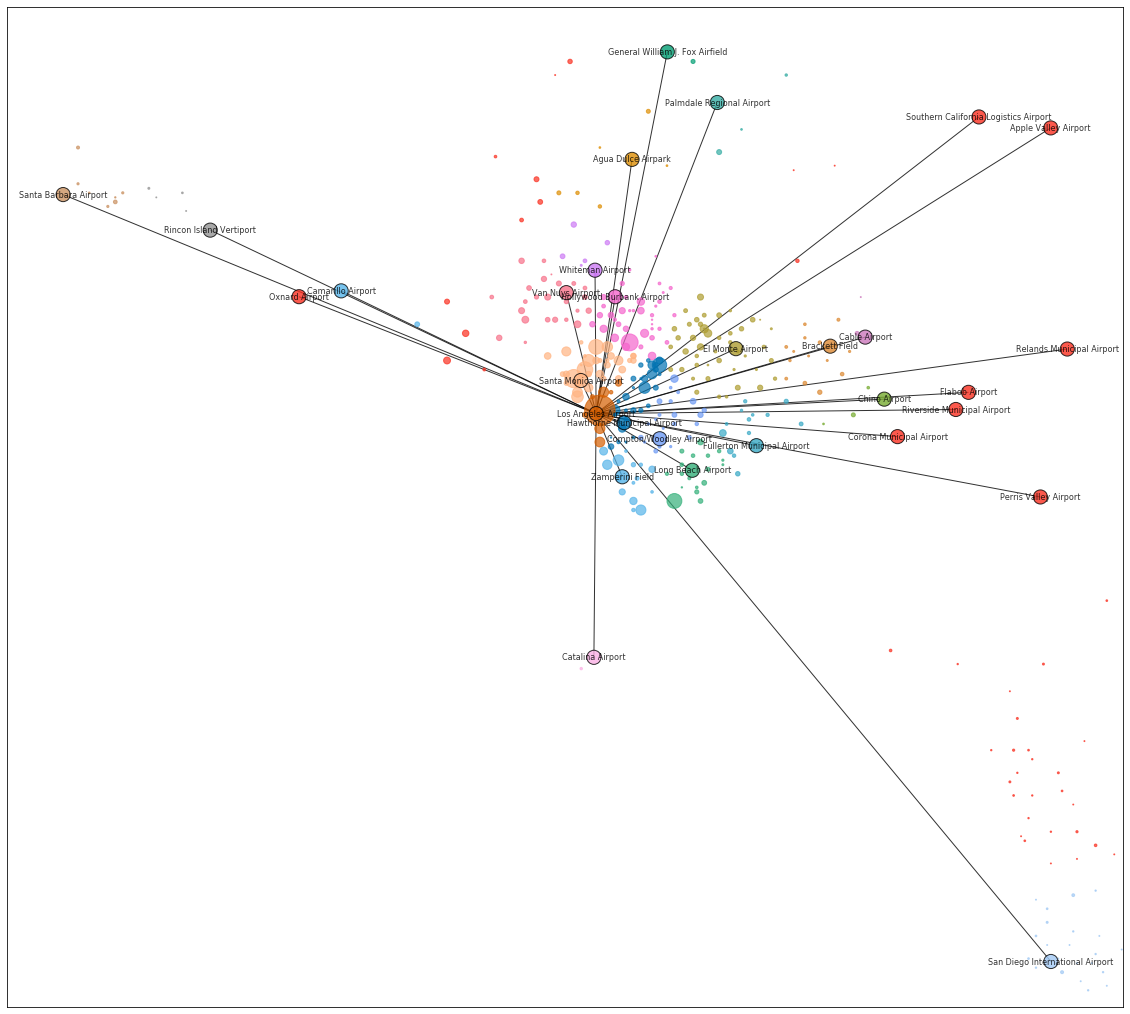

In [30]:
fig, ax = plt.subplots(figsize = (20, 18.4))
nx.draw_networkx(demand_network_nodes, pos = lat_lon_dict_zipcode, 
                 node_size = [s for s in list(zip_code_dict.values())], 
                 node_color = colorlist, with_labels = False, alpha = 0.7, ax = ax)
nx.draw_networkx(regional_airports_la_network, pos = lat_lon_dict_airports, node_size = 200, 
                 node_color = airport_color_list_actually_a_list, font_size = 8, alpha = 0.8, 
                 ax = ax, edgecolors = 'black', connectionstyle='arc3, rad = 0.1')
plt.xlim(xlim[0], xlim[1])
plt.ylim(ylim[0], ylim[1])
#plt.savefig('network.png', transparent= True, bbox_inches = 'tight', pad_inches = 0, dpi = 300)
plt.show()

In [31]:
empty_airport_dict = {}
for airport in uniqueAirportValues:
    empty_airport_dict[airport] = []

In [32]:
for airport_2 in empty_airport_dict:
    for zipcode_2 in closest_airport_name_dict:
        if airport_2 == closest_airport_name_dict[zipcode_2]:
            empty_airport_dict[airport_2].append(zipcode_2)

In [33]:
passenger_demand = pd.DataFrame(columns = ['Airport', 'Percent Passengers (%)', 'Total Potential Passengers per Year'])
airport_names_list = []
percent_passengers_list = []
total_passengers_list = []

for airport_3 in empty_airport_dict:
    zipcodes_served = empty_airport_dict[airport_3]
    airport_names_list.append(airport_3)
    current_sum = 0;
    for bb in zipcodes_served:
        num_pass = zip_code_dict[bb]
        current_sum += num_pass
    current_percent = current_sum/len(lax_raw_data)*100
    current_potential_total = (current_percent/100)*43777129
    percent_passengers_list.append(round(current_percent, 2))
    total_passengers_list.append(int(round(current_potential_total, 0)))

passenger_demand['Airport'] = airport_names_list
passenger_demand['Percent Passengers (%)'] = percent_passengers_list
passenger_demand['Total Potential Passengers per Year'] = total_passengers_list
passenger_demand = passenger_demand.set_index('Airport')

In [34]:
passenger_demand

,Percent Passengers (%),Total Potential Passengers per Year
Airport,,
Van Nuys Airport,2.36,1031095
Brackett Field,0.52,225914
El Monte Airport,3.45,1511887
Chino Airport,0.11,50203
Long Beach Airport,1.98,865039
Palmdale Regional Airport,0.15,65650
Fullerton Municipal Airport,0.92,401625
Compton/Woodley Airport,1.44,629470
Whiteman Airport,0.48,208536


### Using Travel Time (Google Maps API) to Calculate Time Saved by Using VTOLs/Vertiports

In [242]:
#defining function to get driving distance from Google Maps API
def get_driving_distance(orig_coord, dest_coord):
    gmaps = googlemaps.Client(key = 'KEY')
    orig_coord_formatted = "{}, {}".format(orig_coord[0], orig_coord[1])
    dest_coord_formatted = "{}, {}".format(dest_coord[0], dest_coord[1])
    try: 
        directions_result = gmaps.directions(orig_coord_formatted,
                                             dest_coord_formatted,
                                             mode = "driving",
                                             departure_time = 1608787800)
        duration_string = directions_result[0]['legs'][0]['duration']['text']
        nums = re.findall('\d+', duration_string)
        if len(nums) > 1:
            hour = int(nums[0])*60
            mins = int(nums[1])
            duration = hour + mins
        else:
            duration = int(nums[0])
    except:
        duration = np.NaN;
    return duration

#for some odd reason, the departure time units are in seconds since Jan. 1, 1970 at midnight UTC. 
#to avoid picking up the effects of traffic, it is set to be at 5:30 am on Dec. 24, 2020 UTC
#(which corresponds to 9:30 pm Dec. 23, 2020 PDT). 

P.S. I used https://www.timeanddate.com/date/durationresult.html?m1=1&d1=1&y1=1970&m2=12&d2=24&y2=2020&h1=0&i1=0&s1=0&h2=05&i2=30&s2=0
to calculate the number of seconds between midnight on Jan. 1, 1970 and 5:30 am Dec. 24, 2020. 

In [246]:
#if you run this cell, you are making more requests from the Google Maps API (so don't run if not necessary)
lax_coords = (regional_airports_la.loc['Los Angeles Airport']['Latitude'], 
              regional_airports_la.loc['Los Angeles Airport']['Longitude'])
vertiport_to_lax_travel_times = {}
for vertiport in lat_lon_dict_airports:
    vert_lat = lat_lon_dict_airports[vertiport][1]
    vert_lon = lat_lon_dict_airports[vertiport][0]
    driving_time_to_lax = get_driving_distance((vert_lat, vert_lon), lax_coords)
    flying_time_to_lax = round(driving_time_to_lax*(1 - 0.83), 2)
    vertiport_to_lax_travel_times[vertiport] = flying_time_to_lax
vertiport_to_lax_travel_times['Los Angeles Airport'] = 0
vertiport_to_lax_travel_times['Catalina Airport'] = 15

In [247]:
del vertiport_to_lax_travel_times['Catalina Airport']

In [248]:
flying_time_list = list(vertiport_to_lax_travel_times.values());

In [249]:
crow_flies_dist = {}
for vv in vertiport_to_lax_travel_times:
    vert_lat = lat_lon_dict_airports[vv][1]
    vert_lon = lat_lon_dict_airports[vv][0]
    curr_distance = geopy.distance.distance((vert_lat, vert_lon),
                                            (lax_coords[0], lax_coords[1])).miles
    crow_flies_dist[vv] = curr_distance
crow_flies_dist_list = list(crow_flies_dist.values())
slope, intercept, r, p, std = linregress(crow_flies_dist_list, flying_time_list)

In [250]:
def linear_function(slope, intercept, x_values):
    #make sure x_values is in array form!
    return slope*x_values + intercept

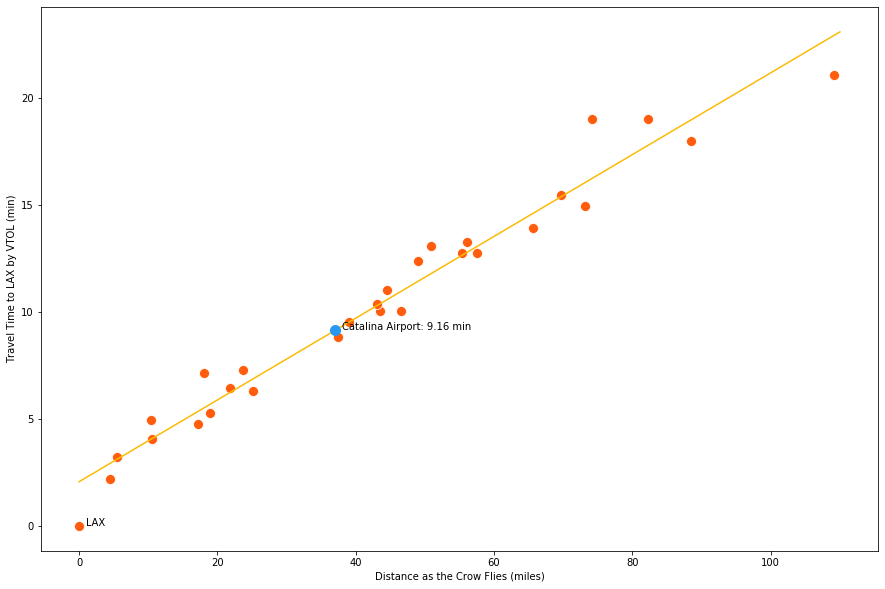

In [251]:
plt.figure(figsize = (15,10))
sns.scatterplot(crow_flies_dist_list, flying_time_list, s = 100, color = '#FF5D0D');
plt.xlabel('Distance as the Crow Flies (miles)');
plt.ylabel('Travel Time to LAX by VTOL (min)');

#plot fitted line on top of scatterplot points
x_values = np.arange(0, 111)
y_values = linear_function(slope, intercept, x_values)
sns.lineplot(x_values, y_values, color = '#fcba03');

#interpolating for Catalina Island Airport
cat_lat = regional_airports_la.loc['Catalina Airport']['Latitude']
cat_lon = regional_airports_la.loc['Catalina Airport']['Longitude']
catalina_distance = geopy.distance.distance((cat_lat, cat_lon),
                                            (lax_coords[0], lax_coords[1])).miles
cat_flying_time = linear_function(slope, intercept, catalina_distance)

#sns.scatterplot throws error when trying to plot just one point, use plt.scatter
plt.scatter(catalina_distance, cat_flying_time, 
            color = '#2698f0', s = 100, zorder=3);
plt.text(1, 0, s = 'LAX');
plt.text(catalina_distance + 1, cat_flying_time, 
         s = 'Catalina Airport: {} min'.format(round(cat_flying_time, 2)));

In [252]:
vertiport_to_lax_travel_times['Catalina Airport'] = round(cat_flying_time, 2)
vertiport_to_lax_travel_times

{'Hollywood Burbank Airport': 7.14,
 'Long Beach Airport': 4.76,
 'Brackett Field': 8.84,
 'Camarillo Airport': 10.03,
 'Chino Airport': 11.05,
 'El Monte Airport': 7.31,
 'Fullerton Municipal Airport': 6.29,
 'General William J. Fox Airfield': 13.26,
 'Hawthorne Municipal Airport': 2.21,
 'Oxnard Airport': 12.41,
 'Palmdale Regional Airport': 13.09,
 'Riverside Municipal Airport': 12.75,
 'Santa Monica Airport': 3.23,
 'Southern California Logistics Airport': 19.04,
 'Van Nuys Airport': 5.27,
 'Whiteman Airport': 6.46,
 'Zamperini Field': 4.93,
 'Agua Dulce Airpark': 9.52,
 'Apple Valley Airport': 19.04,
 'Cable Airport': 10.37,
 'Compton/Woodley Airport': 4.08,
 'Corona Municipal Airport': 10.03,
 'Flabob Airport': 12.75,
 'Perris Valley Airport': 15.47,
 'Relands Municipal Airport': 14.96,
 'Santa Barbara Airport': 18.02,
 'Rincon Island Vertiport': 13.94,
 'San Diego International Airport': 21.08,
 'Los Angeles Airport': 0,
 'Catalina Airport': 9.16}

In [256]:
#if you run this cell, you are making more requests from the Google Maps API (so don't run if not necessary)
total_travel_times = {}
driving_time_comparison = {}

for ww in closest_airport_name_dict:
    current_closest_airport = closest_airport_name_dict[ww]

    if current_closest_airport == 'None':
        total_travel_times[ww] = 'None'
        driving_time_comparison[ww] = 'None'
    else:
        zipcode_coords = lat_lon_dict_zipcode[ww]
        zipcode_lat = zipcode_coords[1]
        zipcode_lon = zipcode_coords[0]
    
        driving_time_comparison[ww] = round(get_driving_distance((zipcode_lat, zipcode_lon), 
                                                                 (lax_coords[0], lax_coords[1])), 2)
        
        vertiport_coords = lat_lon_dict_airports[current_closest_airport]
        vert_lat = vertiport_coords[1]
        vert_lon = vertiport_coords[0]
        
        vertiport_to_lax_time = vertiport_to_lax_travel_times[current_closest_airport]
    
        current_driving_time = get_driving_distance((zipcode_lat, zipcode_lon), 
                                                    (vert_lat, vert_lon))
        total_travel_time = current_driving_time + vertiport_to_lax_time
        total_travel_times[ww] = round(total_travel_time, 2)

In [410]:
comparison_dict = {key:value - total_travel_times[key] for key, value in driving_time_comparison.items() if value != 'None'}
# this next line reorders the dictionary to match the zip_code_dict (the order the network is originall
# drawn in)
zip_code_dict_selected = {key: zip_code_dict[key] for key, value in comparison_dict.items()}


In [412]:
demand_network_nodes_reordered = nx.Graph()
for gg in zip_code_dict_selected:
    demand_network_nodes_reordered.add_node(gg)

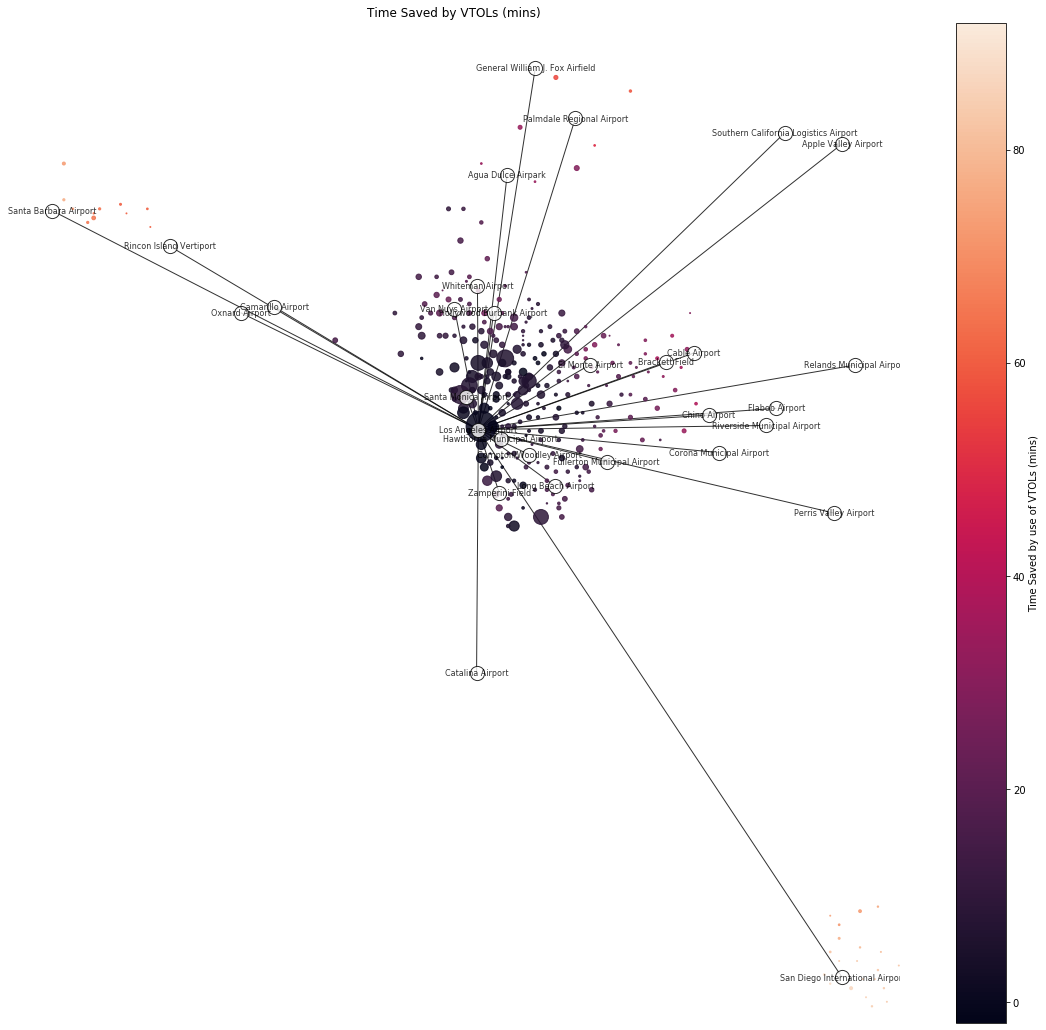

In [471]:
fig1, ax1 = plt.subplots(figsize = (20, 18.4))

vmin = min(list(comparison_dict.values()))
vmax = max(list(comparison_dict.values()))
cmap = sns.cm.rocket

nx.draw(demand_network_nodes_reordered, pos = lat_lon_dict_zipcode, 
        node_size = [s for s in list(zip_code_dict_selected.values())], 
        node_color = list(comparison_dict.values()), cmap = cmap,
        vmin=vmin, vmax=vmax, with_labels = False, ax = ax1, alpha = 0.85)

#creating the color mapped colorbar
sm = plt.cm.ScalarMappable(cmap = cmap, norm = plt.Normalize(vmin = vmin, vmax=vmax))

nx.draw_networkx(regional_airports_la_network, pos = lat_lon_dict_airports, node_size = 200, 
                 node_color = 'white', font_size = 8, alpha = 0.8, 
                 ax = ax1, edgecolors = 'black', zorder=2)

plt.xlim(xlim[0], xlim[1])
plt.ylim(ylim[0], ylim[1])
sm._A = []
cbar = plt.colorbar(sm)
cbar.set_label('Time Saved by use of VTOLs (mins)')
plt.title('Time Saved by VTOLs (mins)');
plt.show()

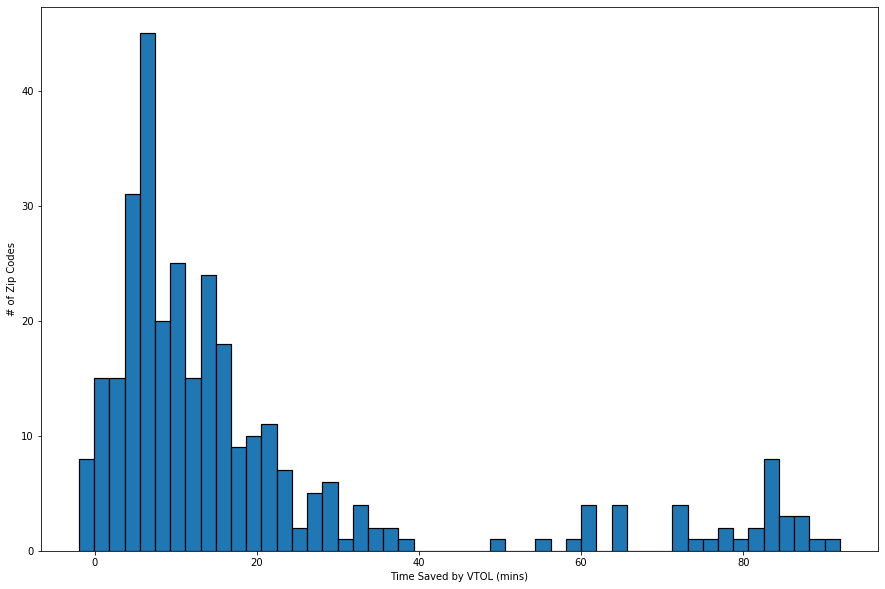

In [450]:
plt.figure(figsize = (15, 10))
plt.hist(list(comparison_dict.values()), bins = 50, edgecolor='black', linewidth=1.2);
plt.xlabel('Time Saved by VTOL (mins)');
plt.ylabel('# of Zip Codes');